# Project - :AI-Powered Pollution Source Identifier using  Geospatial Analytics.

## Project Introduction

###Project Statement
Pollution monitoring systems typically measure pollutant levels but fail to identify the specific sources,
limiting  the ability of authorities and urban planners to take targeted and effective actions. This project
leverages  machine learning, weather data, and geospatial analytics to predict the likely source of
pollution—such as  industrial activity, vehicular traffic, agricultural burning, or natural causes. The system
ingests real-time  pollution sensor data, weather parameters, and surrounding location features to classify
pollution sources,  generate geospatial heatmaps, and issue alerts for high-risk zones, thereby supporting
data-driven  environmental decision-making.

###Outcomes


*    Predict likely sources of pollution (e.g., industrial, vehicular).
*   Display real-time pollution hotspots and risk zones on interactive maps.


*   Trigger pollution alerts based on threshold exceedance and source confidence.
*   Enable data-driven policy-making and urban planning.



*   Generate reports and visualizations for environmental agencies.  







###Modules to be implemented

• Data Collection from APIs and location databases  
• Data Cleaning and Feature Engineering  
• Source Labeling and Simulation  
• Model Training and Source Prediction  
• Geospatial Mapping and Heatmap Visualization  
• Real-Time Dashboard and Alerts  
• Final Documentation and Presentation  

###System Architecture for Pollution Source Identifier using AI and Geospatial Analytics
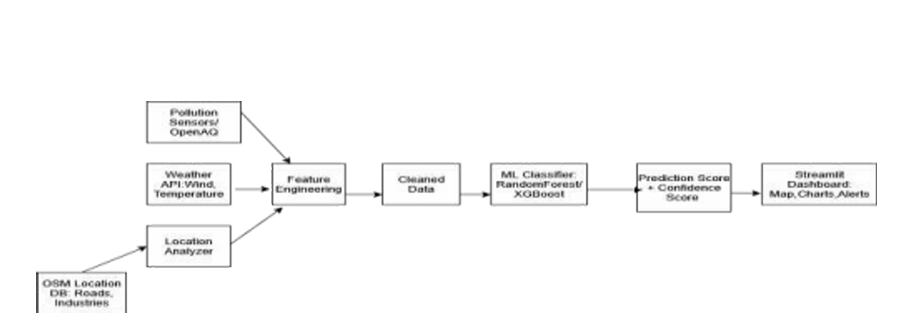

###Data Flow and Machine Learning Workflow for Pollution Source Identifier  

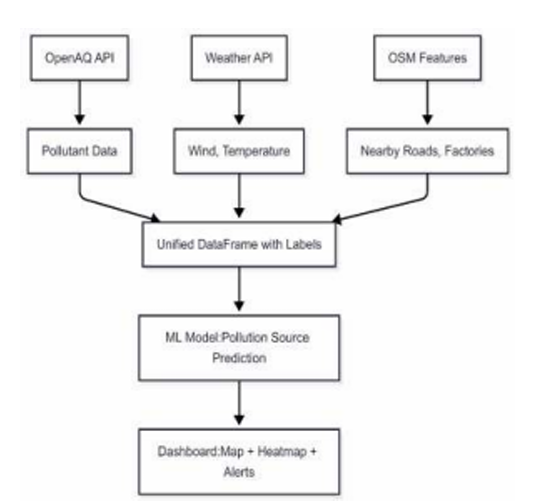

##Setup


###Dependencies and Imports

| Library                  | Import Statement                                      | Purpose (Short Description) |
|--------------------------|-------------------------------------------------------|----------------------------|
| **pandas**               | `import pandas as pd`                                | Data manipulation and analysis; provides powerful data structures like DataFrames for handling tabular data. |
| **numpy**                | `import numpy as np`                                 | Fundamental package for scientific computing; supports large multi-dimensional arrays and mathematical functions. |
| **matplotlib.pyplot**    | `import matplotlib.pyplot as plt`                    | Core plotting library for creating static, animated, and interactive visualizations (e.g., charts, plots). |
| **seaborn**              | `import seaborn as sns`                              | High-level statistical data visualization built on matplotlib; makes complex plots (heatmaps, violin plots, etc.) easier and more attractive. |
| **aiohttp**              | `import aiohttp`                                     | Asynchronous HTTP client/server framework; used for making fast, concurrent API requests. |
| **asyncio**              | `import asyncio`                                     | Provides infrastructure for writing asynchronous code using the `async/await` syntax (essential for aiohttp). |
| **tqdm**                 | `from tqdm import tqdm`                              | Fast, extensible progress bar library; displays progress of loops or async tasks nicely in notebooks. |
| **sklearn** (scikit-learn) | Various imports from `sklearn.*`                    | Comprehensive machine learning library: |
|                          | `from sklearn.model_selection import train_test_split` | Splits datasets into training and testing sets. |
|                          | `from sklearn.preprocessing import StandardScaler, LabelEncoder` | Scales features (`StandardScaler`) and encodes categorical labels (`LabelEncoder`). |
|                          | `from sklearn.cluster import KMeans`                 | Implements K-Means clustering algorithm. |
|                          | `from sklearn.mixture import GaussianMixture`        | Implements Gaussian Mixture Model clustering. |
|                          | `from sklearn.metrics import classification_report, confusion_matrix, accuracy_score` | Evaluation metrics for classification models. |
|                          | `from sklearn.tree import DecisionTreeClassifier`    | Decision Tree classifier. |
|                          | `from sklearn.ensemble import RandomForestClassifier` | Random Forest ensemble classifier. |
| **xgboost**              | `from xgboost import XGBClassifier`                  | Optimized gradient boosting library; provides a powerful and fast implementation of XGBoost classifier. |
| **joblib**               | `import joblib`                                      | Efficient serialization/deserialization of Python objects; commonly used for saving and loading trained ML models. |
| **google.colab**         | `from google.colab import userdata`                  | Access Colab Secrets (environment variables/API keys) securely without exposing them in code. |



In [10]:
# =========================
# Core Data & Math
# =========================
import pandas as pd
import numpy as np
# =========================
# Visualization
# =========================
import matplotlib.pyplot as plt
import seaborn as sns
# =========================
# Async API Handling
# =========================
import aiohttp
import asyncio
from tqdm import tqdm
# =========================
# Machine Learning
# =========================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# =========================
# Model Persistence
# =========================
import joblib
# =========================
# API Key (Colab Secrets)
# =========================
from google.colab import userdata

###API keys and endpoints

### OpenWeatherMap API Endpoints Used

- **`AIR_URL = "https://api.openweathermap.org/data/2.5/air_pollution"`**  
  Fetches **current air pollution data** (or forecast/historical with additional parameters) for specified latitude/longitude.  
  Includes Air Quality Index (AQI) and concentrations of pollutants: CO, NO, NO₂, O₃, SO₂, NH₃, PM2.5, PM10.  
  Documentation: [https://openweathermap.org/api/air-pollution](https://openweathermap.org/api/air-pollution)

- **`WEATHER_URL = "https://api.openweathermap.org/data/2.5/weather"`**  
  Retrieves **current weather data** for a location (by city name, coordinates, or zip code).  
  Includes temperature, humidity, pressure, wind, cloudiness, weather conditions, and more.  
  Documentation: [https://openweathermap.org/current](https://openweathermap.org/current)

### API Key Requirement
All requests to these endpoints require a valid **OpenWeatherMap API key** appended as `&appid={YOUR_API_KEY}`.  

- Sign up for a free account and get your API key here: [https://home.openweathermap.org/users/sign_up](https://home.openweathermap.org/users/sign_up)  
- Manage keys: [https://home.openweathermap.org/api_keys](https://home.openweathermap.org/api_keys)  
- Free plan includes these APIs with call limits (e.g., 60 calls/minute for current weather).

Store the key securely in Colab Secrets (e.g., as `"OPENWEATHER_API_KEY"`) and retrieve with `userdata.get()`.

In [13]:
from google.colab import userdata
API_KEY = userdata.get("OPENAI_API_KEY")

### Dataset Overview

The dataset is a **pandas DataFrame** with **21,882 rows** (cities/locations) and **4 columns**:

| Column    | Data Type | Description                  | Non-Null Count |
|-----------|-----------|------------------------------|----------------|
| Country   | object    | Country name                 | 21,882        |
| City      | object    | City name                    | 21,882        |
| Latitude  | float64   | Geographic latitude          | 21,882        |
| Longitude | float64   | Geographic longitude         | 21,882        |

- Total entries: ~22,000 unique locations worldwide.
- No missing values — fully complete.

### Purpose & Next Steps

We will **iterate over each row** of this DataFrame and use the **Latitude** and **Longitude** values to make API calls to OpenWeatherMap:

- Fetch **current weather data** (temperature, humidity, pressure, etc.)
- Fetch **current air pollution data** (AQI, PM2.5, PM10, CO, NO₂, etc.)

This will enrich the dataset with real-time environmental information for all ~22,000 locations.

### Project Approach

1. **Data Collection**  
   Use the OpenWeatherMap API (with securely stored API key) to fetch real-time data for ~22,000 locations:  
   - Current **air pollution** (PM2.5, PM10, NO₂, CO, SO₂, O₃, NH₃)  
   - Current **weather** (temperature, humidity, wind speed, wind direction)

2. **Feature Engineering**  
   - Combine fetched data with location info (country, city, lat/lon)  
   - Create derived features, e.g., **Pollution Risk Index (PRI)** from pollutant levels  
   - Derive the target variable: **`severity`** (Low / Medium / High / Critical) based on pollution thresholds

3. **Model Training**  
   Train three classification models to predict **`severity`** from the engineered features:  
   - Decision Tree (DT)  
   - Random Forest (RF)  
   - XGBoost (XGB)  

4. **Evaluation & Selection**  
   Compare performance (accuracy, F1-score, etc.) and select the best-performing model for final use.

This creates a robust system to predict air pollution severity at any location using live weather and pollution data.

##Implementation

###Milestone 1: Week 1-2  


####Module 1: Data Collection from APIs and location databases


• Collect air quality data (PM2.5, PM10, NO₂, CO, SO₂, O₃) from the OpenAQ API for selected locations.   
•
Collect weather data (temperature, humidity, wind speed, wind direction) from the OpenWeatherMap  
API.  
• Extract nearby physical features such as roads, industrial zones, dump sites, and agricultural fields using  
OpenStreetMap via OSMnx.  
• Tag each data point with latitude, longitude, timestamp, and source API metadata.  
• Store
the collected data in structured CSV/JSON format for preprocessing and modeling.

#####Step 1: Dataset Import
First we will use the available dataset to iterate over the rows and get the latitude and longitude details of the ocations whose data is to be fetched.

In [11]:
df = pd.read_csv('pollution.csv')
df

,Country,City,Latitude,Longitude
0,Romania,Poiana Mare,43.92,23.07
1,China,Pingyin,36.28,116.45
2,Germany,Puttlingen,49.29,6.89
3,China,Qinzhou,21.95,108.62
4,Republic of North Macedonia,Radovis,41.64,22.46
...,...,...,...,...
21877,India,Gursahaiganj,27.12,79.72
21878,France,Sceaux,48.78,2.29
21879,India,Mormugao,15.40,73.80
21880,Malaysia,Marang,5.21,103.21


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21882 entries, 0 to 21881
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    21882 non-null  object 
 1   City       21882 non-null  object 
 2   Latitude   21882 non-null  float64
 3   Longitude  21882 non-null  float64
dtypes: float64(2), object(2)
memory usage: 683.9+ KB


#####Step 2: Set up and call API fetching code

Now we will use the endpoint links and use them to fetch the pollution profile and weather profile data and call the functions to start fetching.

In [20]:
AIR_URL = "https://api.openweathermap.org/data/2.5/air_pollution"
WEATHER_URL = "https://api.openweathermap.org/data/2.5/weather"
MAX_CONCURRENT_REQUESTS = 25
TIMEOUT = aiohttp.ClientTimeout(total=8)
semaphore = asyncio.Semaphore(MAX_CONCURRENT_REQUESTS)
async def fetch_location(session, row):
    async with semaphore:
        try:
            air_task = session.get(
                AIR_URL,
                params={"lat": row.latitude, "lon": row.longitude, "appid": API_KEY}
            )
            weather_task = session.get(
                WEATHER_URL,
                params={
                    "lat": row.latitude,
                    "lon": row.longitude,
                    "appid": API_KEY,
                    "units": "metric"
                }
            )
            air_resp, weather_resp = await asyncio.gather(air_task, weather_task)
            if air_resp.status != 200 or weather_resp.status != 200:
                return None
            air = await air_resp.json()
            weather = await weather_resp.json()
            comp = air["list"][0]["components"]
            return {
                "country": row.country,
                "city": row.city,
                "latitude": row.latitude,
                "longitude": row.longitude,
                "pm2_5": comp.get("pm2_5"),
                "pm10": comp.get("pm10"),
                "no2": comp.get("no2"),
                "co": comp.get("co"),
                "so2": comp.get("so2"),
                "o3": comp.get("o3"),
                "nh3": comp.get("nh3"),
                "temperature": weather["main"].get("temp"),
                "humidity": weather["main"].get("humidity"),
                "wind_speed": weather["wind"].get("speed"),
                "wind_deg": weather["wind"].get("deg"),
            }
        except Exception:
            return None
async def run_fast(df):
    connector = aiohttp.TCPConnector(limit=MAX_CONCURRENT_REQUESTS, ssl=False)
    async with aiohttp.ClientSession(connector=connector, timeout=TIMEOUT) as session:
        tasks = [fetch_location(session, row) for row in df.itertuples()]
        results = []
        for task in tqdm(asyncio.as_completed(tasks), total=len(tasks)):
            res = await task
            if res:
                results.append(res)
        return results

In [23]:
results = await run_fast(locations_df)
extracted_df = pd.DataFrame(results)
print("Fetched rows:", len(extracted_df))
extracted_df.head()

100%|██████████| 21882/21882 [03:47<00:00, 95.98it/s]


Fetched rows: 21882


,country,city,latitude,longitude,pm2_5,pm10,no2,co,so2,o3,nh3,temperature,humidity,wind_speed,wind_deg
0,Brazil,Leme,-22.19,-47.39,14.30,15.66,4.95,260.30,0.70,34.12,2.22,21.62,88,1.34,106
1,Germany,Gotha,50.95,10.70,17.71,21.00,37.38,325.42,3.64,6.56,12.52,-3.90,99,4.63,230
2,Denmark,Ishoj,55.62,12.35,1.38,4.31,1.93,127.11,0.47,88.82,0.65,-0.09,97,4.12,280
3,Russian Federation,Ipatovo,45.72,42.90,3.59,4.26,11.59,207.26,3.33,43.89,1.17,-1.32,88,2.62,163
4,United States of America,Lake Wales,27.90,-81.59,10.13,13.03,4.70,183.18,0.36,62.98,0.14,14.98,91,0.00,0


#####Step 3: Data saving

Now that we have extracted the data, we will save it for future use as we have to analyze it and use it for training.

In [ ]:
extracted_df.to_csv('extracted_pollution_data.csv', index=False)

####Module 2: Data Cleaning and Feature Engineering  

• Remove duplicate entries and invalid records from raw datasets.  
• Handle missing values using interpolation or mean/median imputation.  
• Standardize timestamps, GPS coordinates, and pollutant units.  
• Normalize pollutant and weather values for consistent model input scaling.  
• Calculate spatial proximity features like distance to nearest road, industry, or dump site.   
• Derive
temporal features such as hour of day, day of week, or season to capture pollution patterns.   
•
Combine datasets (pollution, weather, location features) into a unified, feature-rich DataFrame.

#####Step 1: Dataset load
Lets load the extracted data again and perform an EDA on it so that we can clean it later

In [77]:
df = pd.read_csv('extracted_pollution_data.csv')
df.head()

,country,city,latitude,longitude,pm2_5,pm10,no2,co,so2,o3,nh3,temperature,humidity,wind_speed,wind_deg
0,Brazil,Leme,-22.19,-47.39,14.30,15.66,4.95,260.30,0.70,34.12,2.22,21.62,88,1.34,106
1,Germany,Gotha,50.95,10.70,17.71,21.00,37.38,325.42,3.64,6.56,12.52,-3.90,99,4.63,230
2,Denmark,Ishoj,55.62,12.35,1.38,4.31,1.93,127.11,0.47,88.82,0.65,-0.09,97,4.12,280
3,Russian Federation,Ipatovo,45.72,42.90,3.59,4.26,11.59,207.26,3.33,43.89,1.17,-1.32,88,2.62,163
4,United States of America,Lake Wales,27.90,-81.59,10.13,13.03,4.70,183.18,0.36,62.98,0.14,14.98,91,0.00,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21882 entries, 0 to 21881
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      21882 non-null  object 
 1   city         21882 non-null  object 
 2   latitude     21882 non-null  float64
 3   longitude    21882 non-null  float64
 4   pm2_5        21882 non-null  float64
 5   pm10         21882 non-null  float64
 6   no2          21882 non-null  float64
 7   co           21882 non-null  float64
 8   so2          21882 non-null  float64
 9   o3           21882 non-null  float64
 10  nh3          21882 non-null  float64
 11  temperature  21882 non-null  float64
 12  humidity     21882 non-null  int64  
 13  wind_speed   21882 non-null  float64
 14  wind_deg     21882 non-null  int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 2.5+ MB


#####Step 2: Distribution and Inconsistency analysis
Nowe we will conduct EDA to see if there are any inconsistencies in the dataset and handle them as per requirements.

In [79]:
df.isnull().sum()

,0
country,0
city,0
latitude,0
longitude,0
pm2_5,0
pm10,0
no2,0
co,0
so2,0
o3,0


In [80]:
print(df.duplicated().sum())

0


There are no null values or duplicates we can just go to next step of visualizing the numerical columns to dee if we need handling of any inconsistencies and also learn the data pattern.

#####Step 3: Visualization
Lets visualise the distribution to get a better idea what to do next.

In [81]:
df.describe(include='all')

,country,city,latitude,longitude,pm2_5,pm10,no2,co,so2,o3,nh3,temperature,humidity,wind_speed,wind_deg
count,21882,21882,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000
unique,175,21882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United States of America,Talovaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.124351,12.169288,31.643938,40.228092,8.540775,295.917905,4.425515,57.725187,2.207311,10.499254,72.502879,2.874479,176.750023
std,NaN,NaN,23.299913,69.169185,60.939244,73.049329,13.020034,331.657977,12.765826,31.992775,4.181271,12.276158,23.855399,2.382253,111.730588
min,NaN,NaN,-54.800000,-159.780000,0.500000,0.500000,0.000000,40.640000,0.000000,0.010000,0.000000,-43.240000,1.000000,0.000000,0.000000
25%,NaN,NaN,14.522500,-46.347500,2.460000,4.370000,1.320000,138.150000,0.410000,33.720000,0.140000,-0.380000,58.000000,1.340000,70.000000
50%,NaN,NaN,35.230000,12.785000,7.540000,11.110000,3.540000,178.535000,1.260000,57.220000,0.530000,10.730000,82.000000,2.240000,189.000000
75%,NaN,NaN,46.087500,72.867500,23.500000,31.570000,8.990000,312.247500,3.790000,77.377500,2.170000,21.560000,92.000000,3.600000,279.000000


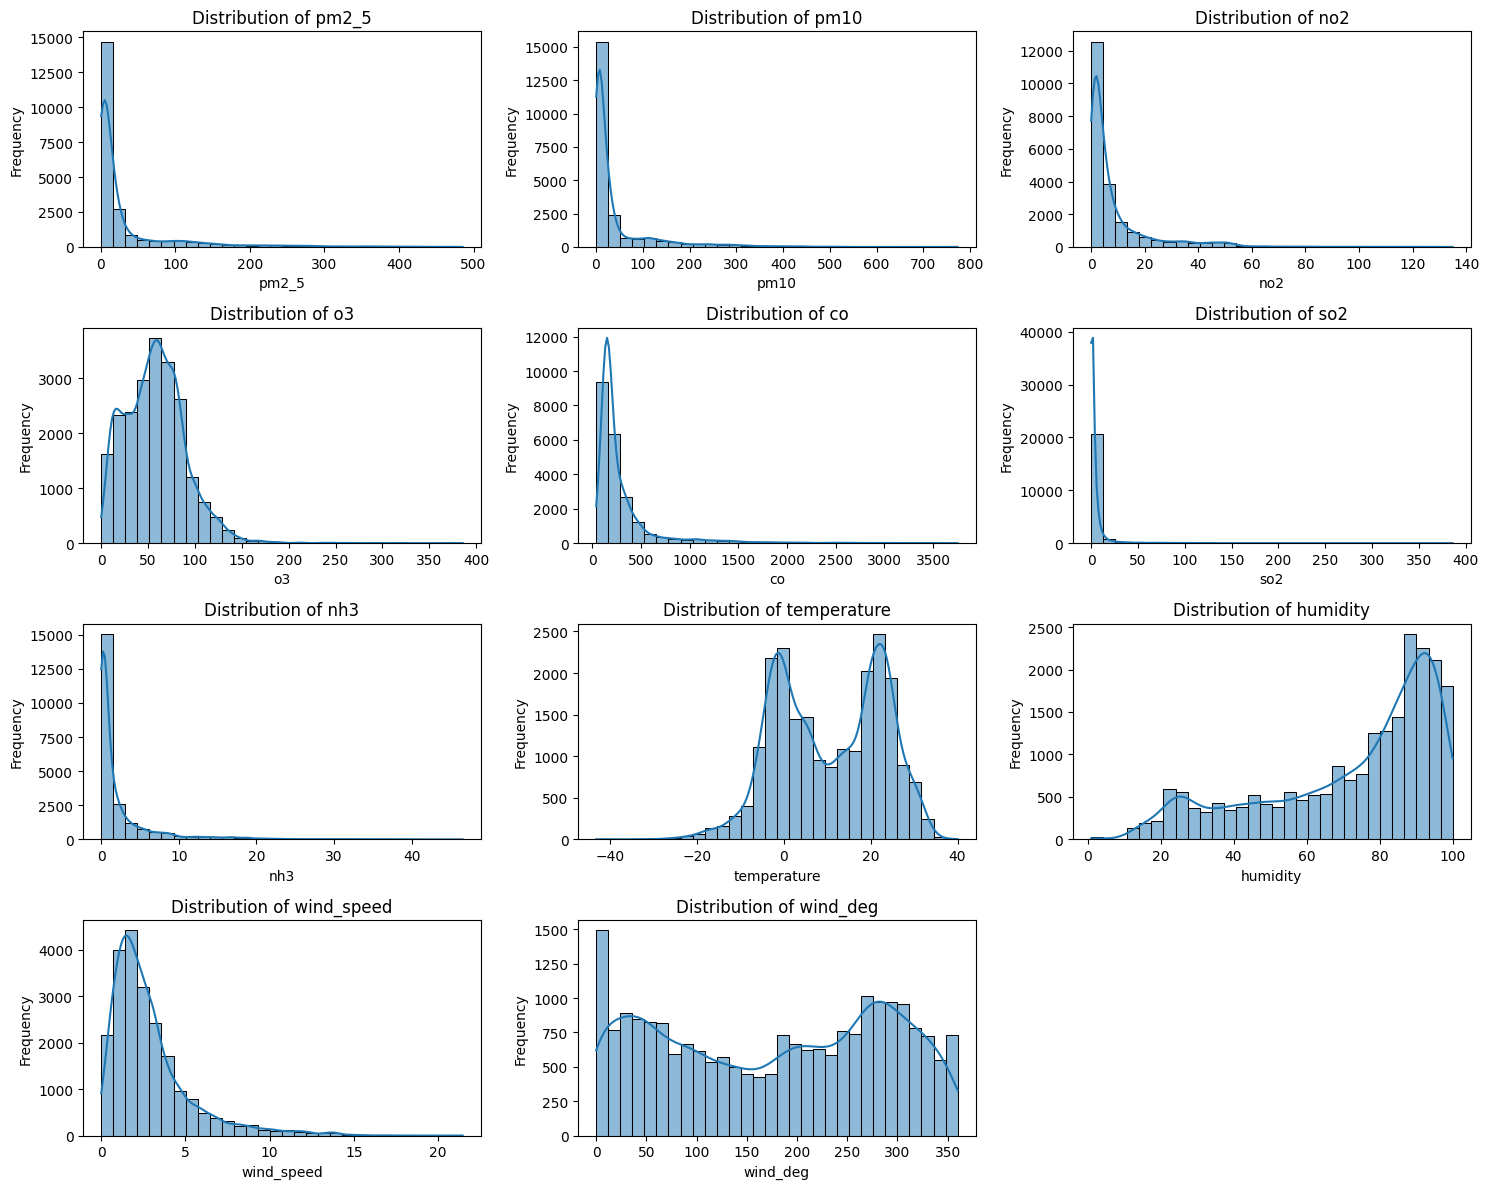

In [82]:
extracted_features = [
    "pm2_5", "pm10", "no2", "o3", "co", "so2", "nh3",
    "temperature", "humidity", "wind_speed", "wind_deg"
]
plt.figure(figsize=(15, 12))
for i, feature in enumerate(extracted_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

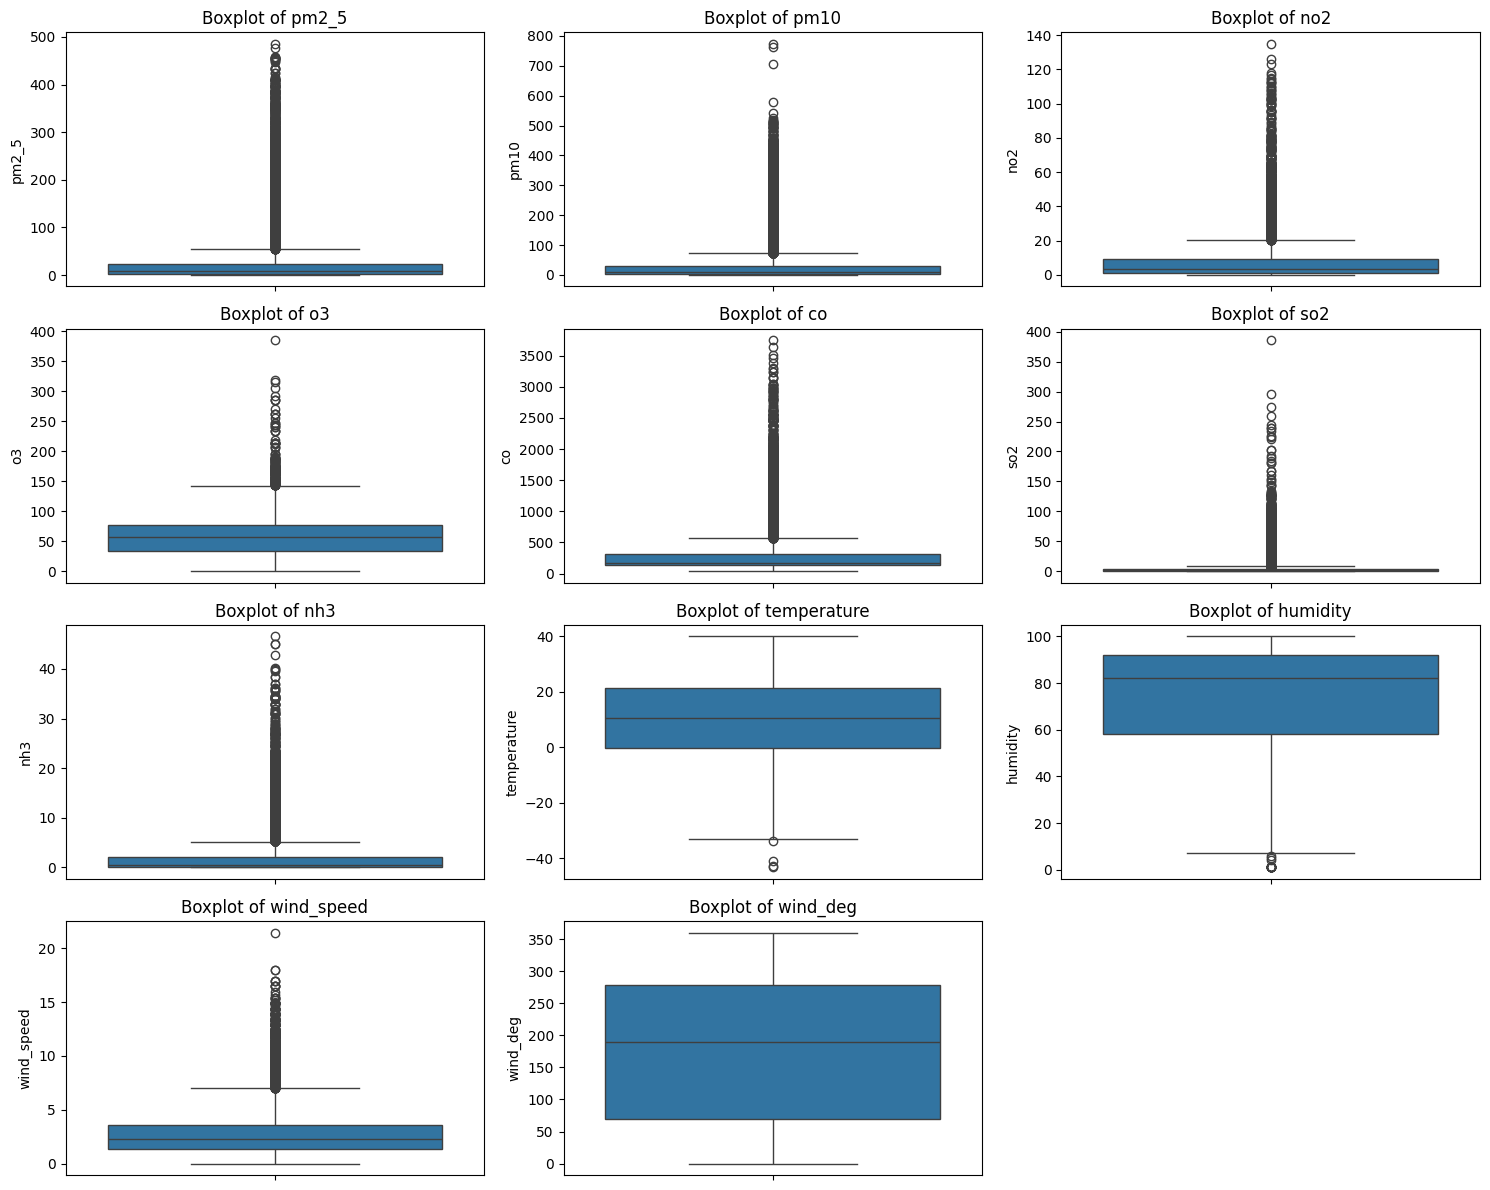

In [83]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(extracted_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

The distribution might be skewed but we are training the model to identify the sererity of ollution through distribution so we do need extremes here for anomaly detection. So we will just proceed to next data labelling step.

###Milestone 2: Week 3–4   

####Module 3: Source Labeling and Simulation
• Define rules to label pollution sources based on proximity and contextual features:   
•
Close to main road + high NO₂ = Vehicular  
• Near factory + high SO₂ = Industrial  
• Near farmland + dry season + high PM = Agricultural  
• Apply heuristics to assign labels like Vehicular, Industrial, Agricultural, Burning, or Natural.   
•
Simulate labeled training data if ground-truth labels are not available.  
• Validate labeling logic using domain knowledge and expert references.  
• Prepare final labeled dataset for model training.  

#####Step 1: Set up rules
We will now create the final features and prepare for modeling:

1. **Engineer Pollution Risk Index (PRI)**  
   - Compute a composite, weighted, weather-adjusted risk score from all pollutants

2. **Apply Clustering**  
   - Group similar locations geographically/pollution-wise using K-Means or GMM → `cluster`

3. **Define Target Variable**  
   - Create `severity` (Low / Medium / High / Critical) based on PRI and pollutant thresholds  
   - Add `severity_confidence` for prediction reliability

4. **Proceed to Model Training**  
   - Train Decision Tree, Random Forest, and XGBoost classifiers  
   - Evaluate and select the best model to predict pollution severity

This will result in a robust, interpretable system for assessing and predicting air quality risk worldwide.

###### Methodology and Formulae Used
**Core Formula**  
$ \text{PRI} = \left( \sum_{\text{pollutant}} w_p \cdot \log(1 + \frac{c_p}{r_p}) \right) \times \text{weather_factor} $

- $c_p$: Measured concentration of pollutant $p$  
- $r_p$: Reference normalization value  
- $w_p$: Health-impact weight  
- $\log(1 + x)$: Non-linear scaling (smooths risk, caps extremes)

**1. Reference Values ($r_p$)** – From global health guidelines  
| Pollutant | Reference (µg/m³) | Source |
|-----------|-------------------|--------|
| PM2.5     | 25                | WHO interim target |
| PM10      | 50                | EPA / India NAAQS |
| NO₂       | 40                | WHO annual mean |
| O₃        | 100               | WHO 8-hour |
| CO        | 2000 (2 mg/m³)    | WHO (converted) |
| SO₂       | 20                | WHO 24-hour |
| NH₃       | 200               | EU reference |

**2. Weights ($w_p$)** – Health impact priority (sum = 1.0)  
| Pollutant | Weight | Reason |
|-----------|--------|--------|
| PM2.5     | 0.30   | Strongest mortality link |
| PM10      | 0.20   | Respiratory effects |
| NO₂       | 0.15   | Airway inflammation |
| O₃        | 0.15   | Oxidative damage |
| CO        | 0.10   | Cardiovascular |
| SO₂       | 0.05   | Irritant |
| NH₃       | 0.05   | Secondary PM precursor |

**3. Weather Amplification**  
$ \text{weather_factor} = 1 + \max(0, 30 - \text{wind_speed}) \times 0.01 + \max(0, \text{humidity} - 60) \times 0.005 + \max(0, \text{temperature} - 35) \times 0.01 $

- Adds uplift for stagnant air, high humidity (particle formation), high temperature (ozone boost)  
- Coefficients keep adjustment moderate (~10–30% in adverse weather)

**Design Rationale**  
- Rule-based → transparent & interpretable  
- Non-linear + weighted → reflects real health risks (PM-dominant)  
- Weather-adjusted → captures environmental amplification  

**Key Sources**  
- [WHO Air Quality Guidelines](https://www.who.int/teams/environment-climate-change-and-health/air-quality)  
- [US EPA Criteria Pollutants](https://www.epa.gov/criteria-air-pollutants)  
- [India NAAQS (CPCB)](https://cpcb.nic.in)  
- [Lancet Commission on Pollution](https://www.thelancet.com/commissions/air-pollution)  
- [NOAA Weather & Air Quality](https://www.noaa.gov/education/resource-collections/weather-atmosphere/air-quality)

**K-Means**  
- Simple, fast algorithm that groups scaled PRI values into 4 hard clusters  
- Ideal for clear, distinct risk tiers  
- Reproducible (`random_state=42`) and stable (`n_init=10`)  
- Clusters ordered by mean PRI → mapped to severity labels

**Gaussian Mixture Model (GMM)**  
- Probabilistic extension of K-Means  
- Models clusters as overlapping Gaussians → better for gradual pollution transitions  
- Provides soft assignments: `predict_proba()` → `severity_confidence` (max probability per location)  
- Adds uncertainty measure (high confidence = clear case; low = borderline risk)

In [84]:
def pollution_risk_index(row):
    ref = {
        "pm2_5": 25,
        "pm10": 50,
        "no2": 40,
        "o3": 100,
        "co": 2,
        "so2": 20,
        "nh3": 200
    }
    weights = {
        "pm2_5": 0.30,
        "pm10": 0.20,
        "no2": 0.15,
        "o3": 0.15,
        "co": 0.10,
        "so2": 0.05,
        "nh3": 0.05
    }
    risk = 0
    for p in ref:
        normalized = np.log1p(row[p] / ref[p])
        risk += normalized * weights[p]
    weather_factor = 1.0
    weather_factor += max(0, (30 - row["wind_speed"])) * 0.01
    weather_factor += max(0, (row["humidity"] - 60)) * 0.005
    weather_factor += max(0, (row["temperature"] - 35)) * 0.01
    return risk * weather_factor
df["PRI"] = df.apply(pollution_risk_index, axis=1)
df.head()

,country,city,latitude,longitude,pm2_5,pm10,no2,co,so2,o3,nh3,temperature,humidity,wind_speed,wind_deg,PRI
0,Brazil,Leme,-22.19,-47.39,14.30,15.66,4.95,260.30,0.70,34.12,2.22,21.62,88,1.34,106,1.058023
1,Germany,Gotha,50.95,10.70,17.71,21.00,37.38,325.42,3.64,6.56,12.52,-3.90,99,4.63,230,1.246625
2,Denmark,Ishoj,55.62,12.35,1.38,4.31,1.93,127.11,0.47,88.82,0.65,-0.09,97,4.12,280,0.798629
3,Russian Federation,Ipatovo,45.72,42.90,3.59,4.26,11.59,207.26,3.33,43.89,1.17,-1.32,88,2.62,163,0.879937
4,United States of America,Lake Wales,27.90,-81.59,10.13,13.03,4.70,183.18,0.36,62.98,0.14,14.98,91,0.00,0,1.006932


#####Step 2: Derive features
Now we will derive the features and calculate values using the rules we declared above

In [85]:
X = df[["PRI"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)
df.head()

,country,city,latitude,longitude,pm2_5,pm10,no2,co,so2,o3,nh3,temperature,humidity,wind_speed,wind_deg,PRI,cluster
0,Brazil,Leme,-22.19,-47.39,14.30,15.66,4.95,260.30,0.70,34.12,2.22,21.62,88,1.34,106,1.058023,0
1,Germany,Gotha,50.95,10.70,17.71,21.00,37.38,325.42,3.64,6.56,12.52,-3.90,99,4.63,230,1.246625,0
2,Denmark,Ishoj,55.62,12.35,1.38,4.31,1.93,127.11,0.47,88.82,0.65,-0.09,97,4.12,280,0.798629,3
3,Russian Federation,Ipatovo,45.72,42.90,3.59,4.26,11.59,207.26,3.33,43.89,1.17,-1.32,88,2.62,163,0.879937,3
4,United States of America,Lake Wales,27.90,-81.59,10.13,13.03,4.70,183.18,0.36,62.98,0.14,14.98,91,0.00,0,1.006932,0


In [86]:
cluster_order = (
    df.groupby("cluster")["PRI"]
    .mean()
    .sort_values()
    .index
)
severity_map = {
    cluster_order[0]: "Low",
    cluster_order[1]: "Moderate",
    cluster_order[2]: "High",
    cluster_order[3]: "Severe"
}
df["severity"] = df["cluster"].map(severity_map)
df["severity"].value_counts()

,count
severity,
Low,12966
Moderate,5189
High,2526
Severe,1201


In [87]:
gmm = GaussianMixture(n_components=4, random_state=42)
df["cluster"] = gmm.fit_predict(X_scaled)
probs = gmm.predict_proba(X_scaled)
df["severity_confidence"] = probs.max(axis=1)
df.describe()

,latitude,longitude,pm2_5,pm10,no2,co,so2,o3,nh3,temperature,humidity,wind_speed,wind_deg,PRI,cluster,severity_confidence
count,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000
mean,28.124351,12.169288,31.643938,40.228092,8.540775,295.917905,4.425515,57.725187,2.207311,10.499254,72.502879,2.874479,176.750023,1.097043,1.772644,0.915827
std,23.299913,69.169185,60.939244,73.049329,13.020034,331.657977,12.765826,31.992775,4.181271,12.276158,23.855399,2.382253,111.730588,0.481797,0.710891,0.119316
min,-54.800000,-159.780000,0.500000,0.500000,0.000000,40.640000,0.000000,0.010000,0.000000,-43.240000,1.000000,0.000000,0.000000,0.433206,0.000000,0.499367
25%,14.522500,-46.347500,2.460000,4.370000,1.320000,138.150000,0.410000,33.720000,0.140000,-0.380000,58.000000,1.340000,70.000000,0.764299,1.000000,0.897979
50%,35.230000,12.785000,7.540000,11.110000,3.540000,178.535000,1.260000,57.220000,0.530000,10.730000,82.000000,2.240000,189.000000,0.901554,2.000000,0.972791
75%,46.087500,72.867500,23.500000,31.570000,8.990000,312.247500,3.790000,77.377500,2.170000,21.560000,92.000000,3.600000,279.000000,1.286363,2.000000,0.990857
max,69.650000,178.420000,485.390000,773.150000,134.930000,3750.840000,386.100000,385.540000,46.570000,40.020000,100.000000,21.460000,360.000000,3.316589,3.000000,1.000000


#####Step 3: Set up training data

Now we will aggregate the features obtained to get the final dataset making it ready for training the model

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21882 entries, 0 to 21881
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              21882 non-null  object 
 1   city                 21882 non-null  object 
 2   latitude             21882 non-null  float64
 3   longitude            21882 non-null  float64
 4   pm2_5                21882 non-null  float64
 5   pm10                 21882 non-null  float64
 6   no2                  21882 non-null  float64
 7   co                   21882 non-null  float64
 8   so2                  21882 non-null  float64
 9   o3                   21882 non-null  float64
 10  nh3                  21882 non-null  float64
 11  temperature          21882 non-null  float64
 12  humidity             21882 non-null  int64  
 13  wind_speed           21882 non-null  float64
 14  wind_deg             21882 non-null  int64  
 15  PRI                  21882 non-null 

In [89]:
df.head()

,country,city,latitude,longitude,pm2_5,pm10,no2,co,so2,o3,nh3,temperature,humidity,wind_speed,wind_deg,PRI,cluster,severity,severity_confidence
0,Brazil,Leme,-22.19,-47.39,14.30,15.66,4.95,260.30,0.70,34.12,2.22,21.62,88,1.34,106,1.058023,1,Moderate,0.782506
1,Germany,Gotha,50.95,10.70,17.71,21.00,37.38,325.42,3.64,6.56,12.52,-3.90,99,4.63,230,1.246625,1,Moderate,0.989822
2,Denmark,Ishoj,55.62,12.35,1.38,4.31,1.93,127.11,0.47,88.82,0.65,-0.09,97,4.12,280,0.798629,2,Low,0.982111
3,Russian Federation,Ipatovo,45.72,42.90,3.59,4.26,11.59,207.26,3.33,43.89,1.17,-1.32,88,2.62,163,0.879937,2,Low,0.937751
4,United States of America,Lake Wales,27.90,-81.59,10.13,13.03,4.70,183.18,0.36,62.98,0.14,14.98,91,0.00,0,1.006932,2,Moderate,0.506605


Now that we have final labelled datasets, we can move on to model training steps


####Module 4: Model Training and Source Prediction
• Split the labeled dataset into training and test sets (e.g., 80/20 split).  
• Train classification models such as:  
• Random Forest  
• XGBoost  
• Decision Tree  
• Use pollutant concentrations, weather, and proximity features as input variables.   
•
Predict the target variable: pollution_source.  
• Tune model hyperparameters using GridSearchCV or RandomizedSearchCV.   
• Evaluate model
performance using accuracy, precision, recall, F1-score, and confusion matrix.   
• Export the trained
model using joblib or pickle for integration in the dashboard.  

In [90]:
df.head()

,country,city,latitude,longitude,pm2_5,pm10,no2,co,so2,o3,nh3,temperature,humidity,wind_speed,wind_deg,PRI,cluster,severity,severity_confidence
0,Brazil,Leme,-22.19,-47.39,14.30,15.66,4.95,260.30,0.70,34.12,2.22,21.62,88,1.34,106,1.058023,1,Moderate,0.782506
1,Germany,Gotha,50.95,10.70,17.71,21.00,37.38,325.42,3.64,6.56,12.52,-3.90,99,4.63,230,1.246625,1,Moderate,0.989822
2,Denmark,Ishoj,55.62,12.35,1.38,4.31,1.93,127.11,0.47,88.82,0.65,-0.09,97,4.12,280,0.798629,2,Low,0.982111
3,Russian Federation,Ipatovo,45.72,42.90,3.59,4.26,11.59,207.26,3.33,43.89,1.17,-1.32,88,2.62,163,0.879937,2,Low,0.937751
4,United States of America,Lake Wales,27.90,-81.59,10.13,13.03,4.70,183.18,0.36,62.98,0.14,14.98,91,0.00,0,1.006932,2,Moderate,0.506605


#####Step 1: Setting up features and target + Scaling + Class Mapping

Now we set up features and target for supervised classification of pollution severity.

- **Features (`X`)**: Raw measurable inputs  
  `pm2_5`, `pm10`, `no2`, `o3`, `co`, `so2`, `nh3`, `temperature`, `humidity`, `wind_speed`, `wind_deg`  
  → Direct pollutant levels + current weather conditions (no derived features included).

- **Target (`y`)**: Engineered categorical label `severity` (Low/Moderate/High/Severe).

- **Label Encoding**:  
  `LabelEncoder` converts string severity classes to integers (0–3) required by tree-based classifiers.  
  Mapping printed for reference and later inverse transformation.

This prepares clean numeric inputs for training models to predict severity from real-time environmental data.

In [91]:
FEATURES = [
    "pm2_5", "pm10", "no2", "o3", "co", "so2", "nh3",
    "temperature", "humidity", "wind_speed", "wind_deg"
]
X = df[FEATURES]
y = df["severity"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Class mapping:")
for cls, enc in zip(le.classes_, range(len(le.classes_))):
    print(cls, "->", enc)

Class mapping:
High -> 0
Low -> 1
Moderate -> 2
Severe -> 3


#####Step 2: Train Test Split

Now we split the dataset into 80:20 Train-Test ratio as mentioned.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

#####Step 3: Setting up Models

Now we will set up the three required models:
> Decision Tree  
> Random Forest  
> XGBoost

######Decision Tree Model Setup


In [93]:
dt_model = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=50,
    random_state=42
)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds, target_names=le.classes_))

Decision Tree Accuracy: 0.9581905414667581
              precision    recall  f1-score   support

        High       0.93      0.92      0.93       505
         Low       0.98      0.98      0.98      2594
    Moderate       0.91      0.94      0.93      1038
      Severe       0.97      0.91      0.94       240

    accuracy                           0.96      4377
   macro avg       0.95      0.94      0.94      4377
weighted avg       0.96      0.96      0.96      4377



######Random Forest Model Setup

In [94]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=20,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds, target_names=le.classes_))

Random Forest Accuracy: 0.9819511080648846
              precision    recall  f1-score   support

        High       0.97      0.98      0.97       505
         Low       0.99      0.99      0.99      2594
    Moderate       0.97      0.96      0.97      1038
      Severe       0.99      0.97      0.98       240

    accuracy                           0.98      4377
   macro avg       0.98      0.98      0.98      4377
weighted avg       0.98      0.98      0.98      4377



######XGBoost Model Setup

In [95]:
xgb_model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds, target_names=le.classes_))

XGBoost Accuracy: 0.9885766506739776
              precision    recall  f1-score   support

        High       0.99      0.99      0.99       505
         Low       0.99      0.99      0.99      2594
    Moderate       0.98      0.98      0.98      1038
      Severe       1.00      0.98      0.99       240

    accuracy                           0.99      4377
   macro avg       0.99      0.99      0.99      4377
weighted avg       0.99      0.99      0.99      4377



#####Step 4: Source Prediction
Now lets see the predictions made by the models and compare them with true labels

In [96]:
comparison_df = pd.DataFrame({
    "True Labels": le.inverse_transform(y_test),
    "Decision Tree Predictions": le.inverse_transform(dt_preds),
    "Random Forest Predictions": le.inverse_transform(rf_preds),
    "XGBoost Predictions": le.inverse_transform(xgb_preds)
})
print("Comparison of True Labels vs. Model Predictions:")
comparison_df.head()

Comparison of True Labels vs. Model Predictions:


,True Labels,Decision Tree Predictions,Random Forest Predictions,XGBoost Predictions
0,High,High,High,High
1,Low,Low,Low,Low
2,Low,Low,Low,Low
3,Low,Low,Low,Low
4,Low,Low,Low,Low


#####Step 5: Model Evaluation
Lets evaluate our model to see which one would be best to implement.

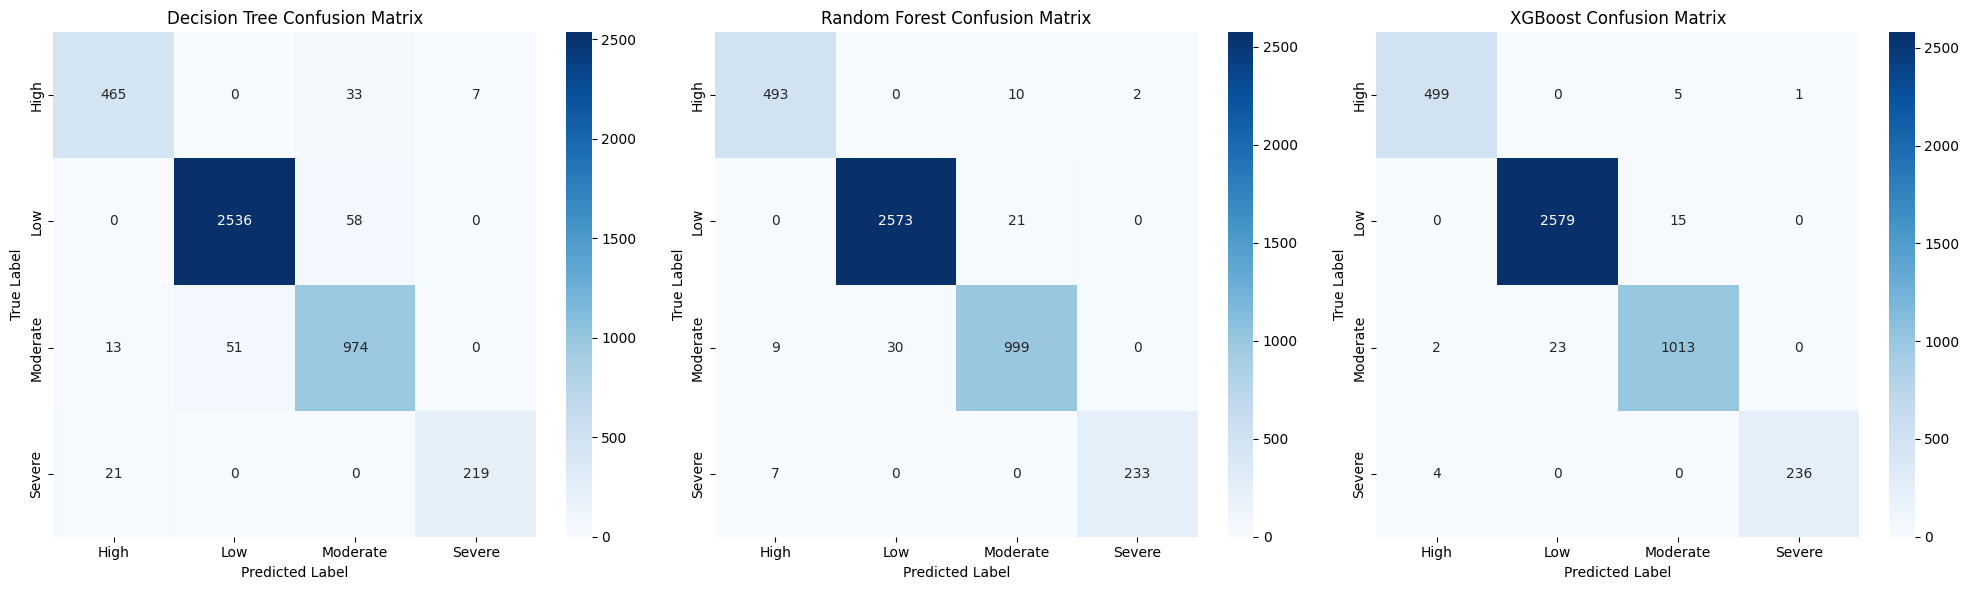

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.heatmap(
    confusion_matrix(y_test, dt_preds),
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[0],
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
sns.heatmap(
    confusion_matrix(y_test, rf_preds),
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[1],
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
sns.heatmap(
    confusion_matrix(y_test, xgb_preds),
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[2],
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
axes[2].set_title('XGBoost Confusion Matrix')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')
plt.tight_layout()
plt.show()

In [49]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, xgb_preds)
    ]
})
results

,Model,Accuracy
0,Decision Tree,0.958191
1,Random Forest,0.981951
2,XGBoost,0.988577


In [50]:
importances = rf_model.feature_importances_
fi = pd.DataFrame({
    "Feature": FEATURES,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
fi

,Feature,Importance
0,pm2_5,0.354840
1,pm10,0.240406
4,co,0.177633
2,no2,0.065984
8,humidity,0.042918
5,so2,0.036080
6,nh3,0.031658
3,o3,0.021106
7,temperature,0.019321
9,wind_speed,0.005452


#####Step 6: Model Selection
Since the models are already performing well >90% accuracy, we dont need to optimize them. We will just implement the `XGBoost` model as it has the highest accuracy. Lets just save the three models for future use.

In [51]:
joblib.dump(dt_model, 'dt_model.joblib')
print("Decision Tree model saved as dt_model.joblib")
joblib.dump(rf_model, 'rf_model.joblib')
print("Random Forest model saved as rf_model.joblib")
joblib.dump(xgb_model, 'xgb_model.joblib')
print("XGBoost model saved as xgb_model.joblib")

Decision Tree model saved as dt_model.joblib
Random Forest model saved as rf_model.joblib
XGBoost model saved as xgb_model.joblib


###Milestone 3: Week 5–6

####Module 5: Geospatial Mapping and Heatmap Visualization  
• Load predictions and location data into an interactive map interface.  
• Use Folium or geopandas to create dynamic pollution heatmaps.  
• Overlay source-specific markers (e.g., ��= Industrial, ��= Vehicular) on the map.   
• Visualize high-risk zones with colored gradients based on pollutant severity.   
• Allow
filtering by date, location, and predicted source category.  
• Export or embed maps into the web dashboard for user interaction.

#####Test Runs

In [98]:
column_names = [
    'pm2_5', 'pm10', 'no2', 'o3', 'co', 'so2', 'nh3',
    'temperature', 'humidity', 'wind_speed', 'wind_deg'
]
ranges = {
    'pm2_5': (0.5, 500.0),
    'pm10': (0.5, 800.0),
    'no2': (0.0, 150.0),
    'o3': (0.0, 400.0),
    'co': (40.0, 4000.0),
    'so2': (0.0, 400.0),
    'nh3': (0.0, 50.0),
    'temperature': (-40.0, 45.0),
    'humidity': (0, 100),
    'wind_speed': (0.0, 25.0),
    'wind_deg': (0, 360)
}
dummy_data = {}
for col in column_names:
    low, high = ranges[col]
    if col in ['humidity', 'wind_deg']:
        dummy_data[col] = np.random.randint(low, high + 1, size=10).astype(float)
    else:
        dummy_data[col] = np.random.uniform(low=low, high=high, size=10)
dummy_df = pd.DataFrame(dummy_data)
print("Dummy DataFrame created successfully:")
display(dummy_df.head())

Dummy DataFrame created successfully:


,pm2_5,pm10,no2,o3,co,so2,nh3,temperature,humidity,wind_speed,wind_deg
0,302.490079,535.250112,69.471909,58.065982,197.449050,94.381439,5.073445,31.134187,1.0,5.184114,63.0
1,161.209681,197.993591,145.298023,105.660572,2488.522285,12.366875,32.598419,42.369964,44.0,10.389178,30.0
2,224.528930,747.776494,76.235976,6.916448,296.190094,172.974743,1.667693,-4.492535,63.0,14.068891,60.0
3,278.176063,104.374282,62.387339,311.922249,3311.789175,96.869947,36.729743,-6.620362,67.0,22.028324,57.0
4,73.812088,568.553944,8.804581,299.032480,3688.029586,211.210334,24.534303,18.098947,97.0,17.177419,111.0


In [99]:
dt_model_loaded = joblib.load('dt_model.joblib')
print("Decision Tree model loaded successfully.")
rf_model_loaded = joblib.load('rf_model.joblib')
print("Random Forest model loaded successfully.")
xgb_model_loaded = joblib.load('xgb_model.joblib')
print("XGBoost model loaded successfully.")

Decision Tree model loaded successfully.
Random Forest model loaded successfully.
XGBoost model loaded successfully.


In [100]:
dt_preds_dummy = dt_model_loaded.predict(dummy_df)
rf_preds_dummy = rf_model_loaded.predict(dummy_df)
xgb_preds_dummy = xgb_model_loaded.predict(dummy_df)
dt_preds_labels = le.inverse_transform(dt_preds_dummy)
rf_preds_labels = le.inverse_transform(rf_preds_dummy)
xgb_preds_labels = le.inverse_transform(xgb_preds_dummy)
dummy_predictions_df = pd.DataFrame({
    "Decision Tree Predictions": dt_preds_labels,
    "Random Forest Predictions": rf_preds_labels,
    "XGBoost Predictions": xgb_preds_labels
})
print("Predictions on Dummy DataFrame:")
display(dummy_predictions_df.head())

Predictions on Dummy DataFrame:


,Decision Tree Predictions,Random Forest Predictions,XGBoost Predictions
0,Severe,Severe,Severe
1,Severe,Severe,Severe
2,Severe,Severe,Severe
3,Severe,Severe,Severe
4,High,Severe,High


##Conclusion
Now that we have trained, tested, evaluated and chosen suitble model, we will use the XGBoost model as discussed on streamlit code

##Final Note
Further modules involve implementation level work so will be carried out through a streamlit app and uploaded on github

---
---
#END
---
---